In [1]:
import numpy as np
seed=7
np.random.seed(seed)

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from keras.constraints import maxnorm
from keras import optimizers

Using Theano backend.


In [3]:
from keras.models import load_model

In [4]:
# Function to create model, required for KerasClassifier
def create_model1(neurons=9):
    model1 = Sequential()
    model1.add(Dense(neurons, input_dim=9, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model1

In [5]:
model=create_model1()

In [6]:
model.save_weights('my_model_weights.h5')

In [7]:
import pandas as pd
df = pd.read_csv("wbc.csv")

In [8]:
df=df.replace('?',np.nan)
df['bare_nuclei'] = pd.to_numeric(df.bare_nuclei.fillna(df.bare_nuclei.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [9]:
X = df.drop([df.columns[-1]], axis=1)
y = df.jenis.map({2: 0, 4: 1})

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [11]:
model1 = KerasClassifier(build_fn=create_model1, class_weight=None, verbose=0)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
neurons2 = [9,18,27,36,45,54,63,72,81]

In [21]:
results=[]
model.load_weights('my_model_weights.h5')

for neurons_idx in range(len(neurons2)):
    param1 = neurons2[neurons_idx]
    def create_model1():
        model1 = Sequential()
        model1.add(Dense(param1, input_dim=9, activation='relu'))
        model1.add(Dense(1, activation='sigmoid'))
        adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
        return model1
    bestmodelNN = KerasClassifier(build_fn=create_model1,  verbose=0)
    model.load_weights('my_model_weights.h5')
    print("Jumlah Hidden Units : %r)" % (param1))
    scores2=cross_val_score(bestmodelNN,X_train.as_matrix(),y_train,cv=10,scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() ))
    results.append(scores2.mean())
    print()
    print()


Jumlah Hidden Units : 9)
Accuracy: 0.9441 (+/- 0.0416)


Jumlah Hidden Units : 18)
Accuracy: 0.9442 (+/- 0.0312)


Jumlah Hidden Units : 27)
Accuracy: 0.9550 (+/- 0.0206)


Jumlah Hidden Units : 36)
Accuracy: 0.9593 (+/- 0.0294)


Jumlah Hidden Units : 45)
Accuracy: 0.9593 (+/- 0.0180)


Jumlah Hidden Units : 54)
Accuracy: 0.9593 (+/- 0.0264)


Jumlah Hidden Units : 63)
Accuracy: 0.9549 (+/- 0.0283)


Jumlah Hidden Units : 72)
Accuracy: 0.9635 (+/- 0.0275)


Jumlah Hidden Units : 81)
Accuracy: 0.9572 (+/- 0.0358)




In [22]:
results

[0.94412580943570779,
 0.94421831637372799,
 0.95499537465309903,
 0.95934320074005552,
 0.95929694727104542,
 0.95925069380203509,
 0.95494912118408881,
 0.96350601295097127,
 0.95716928769657716]

In [23]:
dfb = pd.read_csv("wbc.csv")
dfb=dfb[dfb.bare_nuclei!='?']
dfb['bare_nuclei']=dfb['bare_nuclei'].astype(object).astype(int)

In [24]:
A = dfb.drop([dfb.columns[-1]], axis=1)
b = dfb.jenis.map({2: 0, 4: 1})

In [25]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=seed)

In [27]:
results2=[]
model.load_weights('my_model_weights.h5')

for neurons_idx in range(len(neurons2)):
    param1 = neurons2[neurons_idx]
    def create_model1():
        model1 = Sequential()
        model1.add(Dense(param1, input_dim=9, activation='relu'))
        model1.add(Dense(1, activation='sigmoid'))
        adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
        return model1
    bestmodelNN = KerasClassifier(build_fn=create_model1,  verbose=0)
    model.load_weights('my_model_weights.h5')
    print("Jumlah Hidden Units : %r" % (param1))
    scores2b=cross_val_score(bestmodelNN,A_train.as_matrix(),b_train,cv=10,scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores2b.mean(), scores2b.std() ))
    results2.append(scores2b.mean())
    print()
    print()

Jumlah Hidden Units : 9
Accuracy: 0.9606 (+/- 0.0215)


Jumlah Hidden Units : 18
Accuracy: 0.9540 (+/- 0.0250)


Jumlah Hidden Units : 27
Accuracy: 0.9496 (+/- 0.0222)


Jumlah Hidden Units : 36
Accuracy: 0.9540 (+/- 0.0316)


Jumlah Hidden Units : 45
Accuracy: 0.9518 (+/- 0.0236)


Jumlah Hidden Units : 54
Accuracy: 0.9561 (+/- 0.0198)


Jumlah Hidden Units : 63
Accuracy: 0.9475 (+/- 0.0261)


Jumlah Hidden Units : 72
Accuracy: 0.9607 (+/- 0.0212)


Jumlah Hidden Units : 81
Accuracy: 0.9628 (+/- 0.0294)




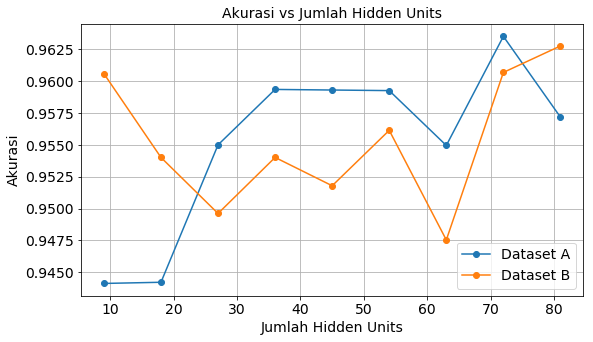

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(neurons2, results, marker='o', label='Dataset A')
ax.plot(neurons2, results2, marker='o',  label='Dataset B')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [32]:
results2

[0.9605797101449276,
 0.95400966183574876,
 0.94961352657004827,
 0.95400966183574876,
 0.95178743961352663,
 0.95613526570048302,
 0.94753623188405789,
 0.96067632850241547,
 0.96275362318840574]

In [ ]:
def create_model1():
    model1 = Sequential()
    model1.add(Dense(81, input_dim=9, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model1

In [ ]:
def create_model2():
    model2 = Sequential()
    model2.add(Dense(23, input_dim=9, activation='relu'))
    model2.add(Dense(23, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model2.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model2

In [ ]:
def create_model3():
    model3 = Sequential()
    model3.add(Dense(17, input_dim=9, activation='relu'))
    model3.add(Dense(17, activation='relu'))
    model3.add(Dense(17, activation='relu'))
    model3.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model3.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model3

In [ ]:
def create_model4():
    model4 = Sequential()
    model4.add(Dense(14, input_dim=9, activation='relu'))
    model4.add(Dense(14, activation='relu'))
    model4.add(Dense(14, activation='relu'))
    model4.add(Dense(14, activation='relu'))
    model4.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model4.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model4

In [ ]:
def create_model5():
    model5 = Sequential()
    model5.add(Dense(12, input_dim=9, activation='relu'))
    model5.add(Dense(12, activation='relu'))
    model5.add(Dense(12, activation='relu'))
    model5.add(Dense(12, activation='relu'))
    model5.add(Dense(12, activation='relu'))
    model5.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model5.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model5

In [ ]:
def create_model6():
    model6 = Sequential()
    model6.add(Dense(11, input_dim=9, activation='relu'))
    model6.add(Dense(11, activation='relu'))
    model6.add(Dense(11, activation='relu'))
    model6.add(Dense(11, activation='relu'))
    model6.add(Dense(11, activation='relu'))
    model6.add(Dense(11, activation='relu'))
    model6.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model6.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model6

In [ ]:
def create_model7():
    model7 = Sequential()
    model7.add(Dense(10, input_dim=9, activation='relu'))
    model7.add(Dense(10, activation='relu'))
    model7.add(Dense(10, activation='relu'))
    model7.add(Dense(10, activation='relu'))
    model7.add(Dense(10, activation='relu'))
    model7.add(Dense(10, activation='relu'))
    model7.add(Dense(10, activation='relu'))
    model7.add(Dense(2, activation='softmax'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model7.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model7

In [ ]:
def create_model8():
    model8 = Sequential()
    model8.add(Dense(10, input_dim=9, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model8.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model8

In [ ]:
def create_model9():
    model9 = Sequential()
    model9.add(Dense(9, input_dim=9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(9, activation='relu'))
    model9.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model9.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model9

In [ ]:
def create_model10():
    model10 = Sequential()
    model10.add(Dense(9, input_dim=9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(9, activation='relu'))
    model10.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model10.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model10

In [ ]:
epochs = [10, 20, 50, 100, 200, 500]
class_weight = [{0 : 1., 1: 2},
                {0 : 1., 1: 4},
                {0 : 1., 1: 8},
                {0 : 1., 1: 16},
                {0 : 1., 1: 32},
                {0 : 1., 1: 64}]
results=[]
model.load_weights('my_model_weights.h5')

for epochs_idx in range(len(epochs)):
  for class_weight_idx in range(len(class_weight)):
    param1 = epochs[epochs_idx]
    param2 = class_weight[class_weight_idx]
    bestmodelNN = KerasClassifier(build_fn=create_model8, epochs= param1, class_weight = param2, verbose=0)
    model.load_weights('my_model_weights.h5')
    bestmodelNN.fit(X_train.as_matrix(), y_train )
    print("Epochs : %r & Class Weight : %r)" % (param1, param2))
    scores1=cross_val_score(bestmodelNN,X_train.as_matrix(),y_train,cv=10,scoring=score_specificity)
    print("Specificity: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() ))
    model.load_weights('my_model_weights.h5')
    scores2=cross_val_score(bestmodelNN,X_train.as_matrix(),y_train,cv=10,scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() ))
    model.load_weights('my_model_weights.h5')
    scores3=cross_val_score(bestmodelNN,X_train.as_matrix(),y_train,cv=10,scoring='recall')
    print("Recall: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() ))
    model.load_weights('my_model_weights.h5')
    scores4=cross_val_score(bestmodelNN,X_train.as_matrix(), y_train, cv=10, scoring=my_custom_scorer)
    print("Score cost: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() ))
    print()
    print()